<a href="https://colab.research.google.com/github/kriskirla/AllProjects/blob/master/Algotrading/Stock_Forecast_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program will predict the stock for a specific day using ML

In [ ]:
!pip install yfinance

In [4]:
# Import libaries
from sklearn.svm import SVR
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
ticker = "AAPL";

# Get data from yahoo finance
df = yf.download(ticker, start="2021-02-01", end=dt.today().strftime('%Y-%m-%d'))
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-01,133.750000,135.380005,130.929993,134.139999,133.939850,106239800
2021-02-02,135.729996,136.309998,134.610001,134.990005,134.788589,83305400
2021-02-03,135.759995,135.770004,133.610001,133.940002,133.740158,89880900
2021-02-04,136.300003,137.399994,134.589996,137.389999,137.184998,84183100
2021-02-05,137.350006,137.419998,135.860001,136.759995,136.759995,75524000
2021-02-08,136.029999,136.960007,134.919998,136.910004,136.910004,71297200
2021-02-09,136.619995,137.880005,135.850006,136.009995,136.009995,76774200
2021-02-10,136.479996,136.990005,134.399994,135.389999,135.389999,73046600
2021-02-11,135.899994,136.389999,133.770004,135.130005,135.130005,64154400


In [ ]:
# ===== ONLY RUN THIS TO TEST RESULT =====
# Get the last row of data to test the correctness
actual_price = df.tail(1)
actual_price
# Get the data except for the last row
df = df.head(len(df) - 1)
df

In [25]:
# Create independant dataset and dependant dataset
df_days = df.index
df_adj_close = df.loc[:, 'Adj Close']

days = [[i.day] for i in df_days ]
adj_close_price = [float(price) for price in df_adj_close]

In [26]:
# Linear Model
lin_svr = SVR(kernel='linear', C=1000)
lin_svr.fit(days, adj_close_price)
# Polynomial Model
poly_svr = SVR(kernel='poly', C=1000, degree=2)
poly_svr.fit(days, adj_close_price)
# Radial Basis Function Model
rbf_svr = SVR(kernel='rbf', C=1000, gamma=0.85)
rbf_svr.fit(days, adj_close_price)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

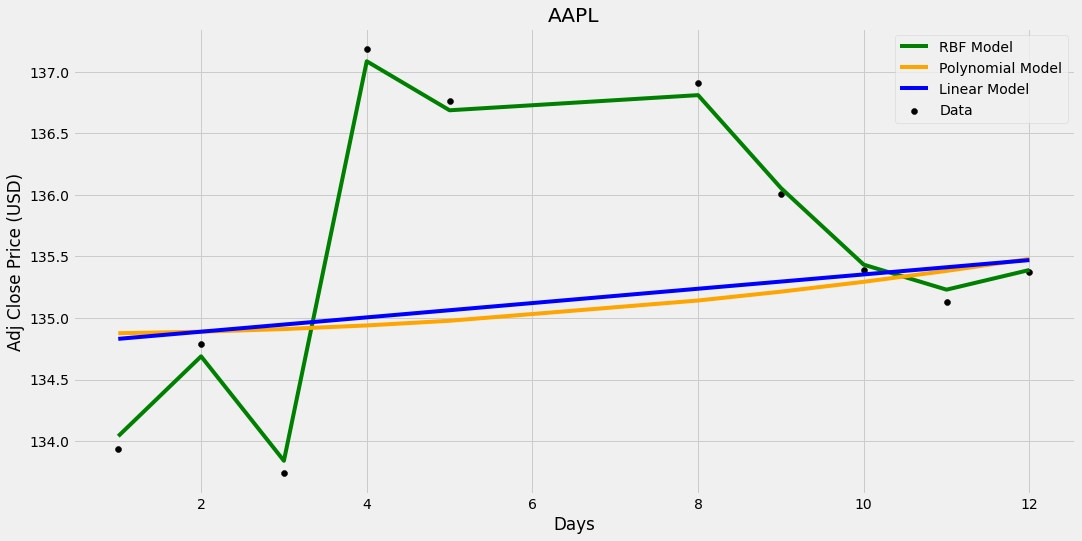

In [27]:
# Plot the models
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_price, color='black', label='Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='blue', label='Linear Model')
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Adj Close Price (USD)')
plt.legend()
plt.show()

In [28]:
# Test the predicted price for the given day
day = [[16]]

print(f"Predicted price using RBF Model: {rbf_svr.predict(day)}")
print(f"Predicted price using Polynomial Model: {poly_svr.predict(day)}")
print(f"Predicted price using Linear Model: {lin_svr.predict(day)}")
#print(f"Actual Price: {actual_price.iloc[0]['Adj Close']}")

Predicted price using RBF Model: [135.50931531]
Predicted price using Polynomial Model: [135.95201298]
Predicted price using Linear Model: [135.70255737]
